# **Author: Joshua Johnson**


The Sparks Foundation: Data Science And Business Analytics Internship

# **TASK 5: Exploratory Data Analysis - Sports**

Problem Statement:

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 

● As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. 

● Suggest teams or players a company should endorse for its products. 

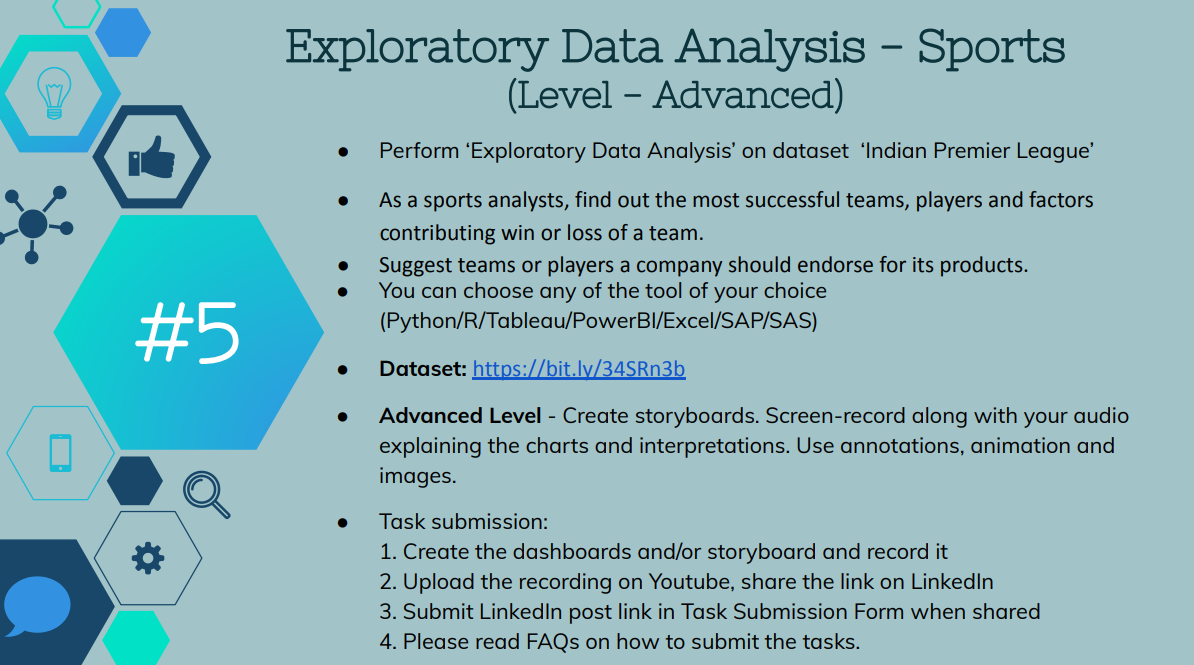

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing deliveries dataset

df = pd.read_csv('/content/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
# Removing the unnecessary columns

df = df.drop(['non_striker','is_super_over','match_id','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','player_dismissed','dismissal_kind','fielder'],  axis=1)

In [5]:
# updated dataset

df.head()

,inning,batting_team,bowling_team,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,4,0,4
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,2


In [6]:
# checking the null values

df.isnull().sum()

inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batsman         0
bowler          0
batsman_runs    0
extra_runs      0
total_runs      0
dtype: int64

In [7]:
# checking unique values of batsman

df.batsman.unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [8]:
# checking unique values of bowlers

df.bowler.unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

**ANALYZING THE BATSMAN WITH RUNS MORE THAN 3000**

In [9]:
# top batsmen with more than 3000 runs

df1=df.groupby("batsman").sum()
df2 =df1.loc[(df1['batsman_runs']>=3000)]
df3 = df2.sort_values(["batsman_runs"],ascending=False)
df3['batsman_runs']

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
Name: batsman_runs, dtype: int64

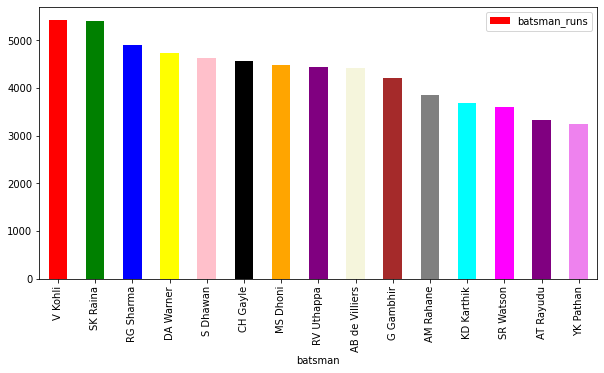

In [10]:
# visualizing batsmen with greater than 3000 runs

data_group_new = df3.reset_index()

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta","purple","violet"])
data_group_new.plot(figsize=(10, 5),kind = 'bar', x = 'batsman', y = 'batsman_runs',color=colors)

In [11]:
# most experienced batsmen based on number of balls faced

df19 = df['batsman'].value_counts()
df19 =df19.to_frame()
df19

,batsman
V Kohli,4211
SK Raina,4044
RG Sharma,3816
S Dhawan,3776
G Gambhir,3524
...,...
K Ahmed,1
U Kaul,1
DP Vijaykumar,1
P Raj,1


**ANALYZING THE MOST ECONOMICAL BOWLERS BASED ON OVERS BOWLED AND RUNS CONCEDED**

In [12]:
# most experienced bowlers based on number of balls bowled

df4 = df['bowler'].value_counts()
df4 =df4.to_frame()
df4

,bowler
Harbhajan Singh,3451
A Mishra,3172
PP Chawla,3157
R Ashwin,3016
SL Malinga,2974
...,...
Y Gnaneswara Rao,6
P Prasanth,6
SPD Smith,2
SN Khan,2


In [13]:
# no of overs bowled by each bowler

df4['bowler'] = df4['bowler'].div(6)
df4
new2 = df4.reset_index()
new2.rename(columns = {'index':'bowler', 'bowler':'overs'}, inplace = True)
new2

,bowler,overs
0,Harbhajan Singh,575.166667
1,A Mishra,528.666667
2,PP Chawla,526.166667
3,R Ashwin,502.666667
4,SL Malinga,495.666667
...,...,...
400,Y Gnaneswara Rao,1.000000
401,P Prasanth,1.000000
402,SPD Smith,0.333333
403,SN Khan,0.333333


In [14]:
# total runs conceded by each bowler

df5=df.groupby('bowler').sum()
df6 = df5.sort_values(["total_runs"], ascending=False)
df6['total_runs']
new = df6['total_runs'].reset_index()
new

,bowler,total_runs
0,PP Chawla,4153
1,Harbhajan Singh,4050
2,A Mishra,3850
3,DJ Bravo,3733
4,UT Yadav,3640
...,...,...
400,LA Carseldine,6
401,SS Mundhe,6
402,AM Rahane,5
403,SPD Smith,5


In [15]:
# bowler economy

mergedRes = pd.merge(new, new2, on ='bowler')
mergedRes["Economy"]=mergedRes['total_runs']/mergedRes['overs']
mergedRes

,bowler,total_runs,overs,Economy
0,PP Chawla,4153,526.166667,7.892936
1,Harbhajan Singh,4050,575.166667,7.041437
2,A Mishra,3850,528.666667,7.282472
3,DJ Bravo,3733,451.833333,8.261896
4,UT Yadav,3640,434.166667,8.383877
...,...,...,...,...
400,LA Carseldine,6,1.166667,5.142857
401,SS Mundhe,6,1.166667,5.142857
402,AM Rahane,5,1.000000,5.000000
403,SPD Smith,5,0.333333,15.000000


In [16]:
# bowler is least economy above 400 overs bowled

df7=mergedRes.groupby("bowler").sum()
df8 =df7.loc[(df7['Economy']<=8) & (df7['overs']>400)]
df9 = df8.sort_values(["Economy"],ascending=True)
df10 = df9.reset_index()
df10

,bowler,total_runs,overs,Economy
0,R Ashwin,3391,502.666667,6.746021
1,SP Narine,2939,433.333333,6.782308
2,Harbhajan Singh,4050,575.166667,7.041437
3,SL Malinga,3511,495.666667,7.083389
4,B Kumar,3264,451.166667,7.234577
5,A Mishra,3850,528.666667,7.282472
6,P Kumar,3342,439.500000,7.604096
7,RA Jadeja,3221,423.500000,7.605667
8,PP Chawla,4153,526.166667,7.892936


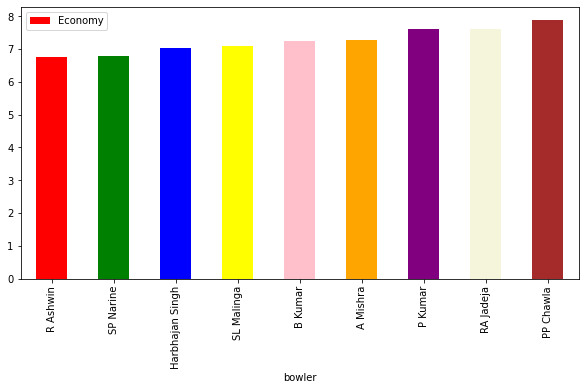

In [17]:
# visualizing the bowlers with least economy 

colors = np.array(["red","green","blue","yellow","pink","orange","purple","beige","brown"])
df10.plot(figsize=(10, 5),kind = 'bar', x = 'bowler', y = 'Economy',color=colors)

**TEAMS WITH MOST RUNS SCORED**

In [18]:
df11=df.groupby("batting_team").sum()
df13 = df11.sort_values(["total_runs"],ascending=True)
df13=df13['total_runs']
df13

batting_team
Kochi Tuskers Kerala            1901
Rising Pune Supergiants         2063
Rising Pune Supergiant          2470
Delhi Capitals                  2630
Gujarat Lions                   4862
Pune Warriors                   6358
Deccan Chargers                11463
Sunrisers Hyderabad            17059
Rajasthan Royals               22431
Delhi Daredevils               24388
Chennai Super Kings            26418
Kolkata Knight Riders          27419
Kings XI Punjab                27893
Royal Challengers Bangalore    28126
Mumbai Indians                 29809
Name: total_runs, dtype: int64

                   batting_team  total_runs
0          Kochi Tuskers Kerala        1901
1       Rising Pune Supergiants        2063
2        Rising Pune Supergiant        2470
3                Delhi Capitals        2630
4                 Gujarat Lions        4862
5                 Pune Warriors        6358
6               Deccan Chargers       11463
7           Sunrisers Hyderabad       17059
8              Rajasthan Royals       22431
9              Delhi Daredevils       24388
10          Chennai Super Kings       26418
11        Kolkata Knight Riders       27419
12              Kings XI Punjab       27893
13  Royal Challengers Bangalore       28126
14               Mumbai Indians       29809


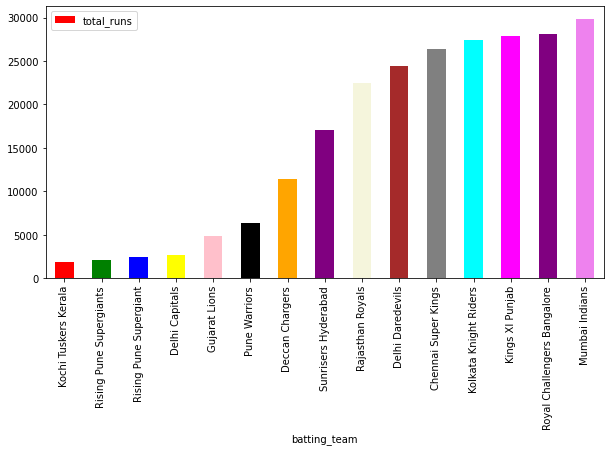

In [19]:
df14 = df13.reset_index()
print(df14)
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta","purple","violet"])
df14.plot(figsize=(10, 5),kind = 'bar', x = 'batting_team', y = 'total_runs',color=colors)

**TEAMS WITH MOST RUNS CONCEDED**

In [20]:
df15=df.groupby("bowling_team").sum()
df16 = df15.sort_values(["total_runs"],ascending=True)
df16=df16['total_runs']
df16

bowling_team
Kochi Tuskers Kerala            1986
Rising Pune Supergiants         2113
Rising Pune Supergiant          2436
Delhi Capitals                  2674
Gujarat Lions                   5090
Pune Warriors                   6857
Deccan Chargers                11618
Sunrisers Hyderabad            16683
Rajasthan Royals               22657
Delhi Daredevils               24811
Chennai Super Kings            25194
Kolkata Knight Riders          27375
Kings XI Punjab                28326
Royal Challengers Bangalore    28569
Mumbai Indians                 28901
Name: total_runs, dtype: int64

                   bowling_team  total_runs
0          Kochi Tuskers Kerala        1986
1       Rising Pune Supergiants        2113
2        Rising Pune Supergiant        2436
3                Delhi Capitals        2674
4                 Gujarat Lions        5090
5                 Pune Warriors        6857
6               Deccan Chargers       11618
7           Sunrisers Hyderabad       16683
8              Rajasthan Royals       22657
9              Delhi Daredevils       24811
10          Chennai Super Kings       25194
11        Kolkata Knight Riders       27375
12              Kings XI Punjab       28326
13  Royal Challengers Bangalore       28569
14               Mumbai Indians       28901


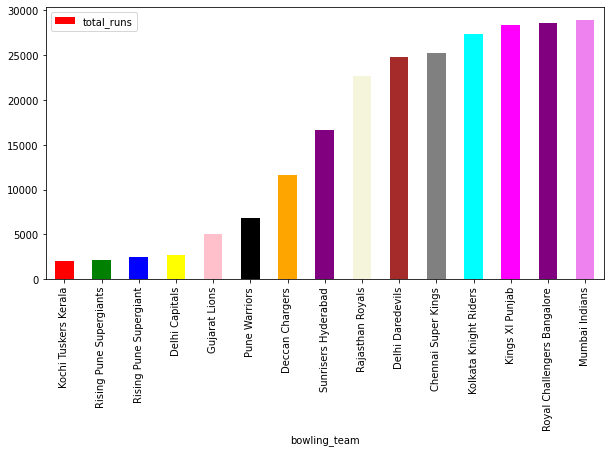

In [21]:
df17 = df16.reset_index()
print(df17)
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta","purple","violet"])
df17.plot(figsize=(10, 5),kind = 'bar', x = 'bowling_team', y = 'total_runs',color=colors)

# FINAL CONCLUSION FROM DELIVERIES DATASET



I]   Top 5 batsmen with most runs:
         

      1.   V Kohli(RCB)-5434
      2.   SK Raina(CSK)- 5415
      3.   RG Sharma(MI) - 4914
      4.   DA Warner(SRH) - 4741
      5.   S Dhawan(SRH) - 4632


II]   Top 5 most experienced batsmen:
         

      1.   V Kohli(RCB)
      2.   SK Raina(CSK)
      3.   RG Sharma(MI) 
      4.   S Dhawan(SRH)
      5.   G Gambhir(KKR)

III]   Top 5 most economical bowlers:
         

      1.   R Ashwin(CSK) - 6.74
      2.   SP Narine(KKR) - 6.78
      3.   Harbhajan Singh(MI) - 7.04
      4.   SL Malinga(MI) - 7.08
      5.   B Kumar(SRH) - 7.23

IV]   Top 5 most experienced bowlers:
         

      1.   Harbhajan Singh(MI)
      2.   Amit Mishra(DD)
      3.   PP Chawla(KKR) 
      4.   R Ashwin(CSK)
      5.   SL Malinga(MI)

V]   Top 5 teams with most runs scored:
         

      1.   Mumbai Indians - 29809
      2.   Royal Challengers Bangalore - 28126
      3.   Kings XI Punjab - 27893
      4.   Kolkata Knight Riders - 27419
      5.   Chennai Super Kings - 26418

V]   Top 5 teams with most runs conceded:
         

      1.   Mumbai Indians - 28901
      2.   Royal Challengers Bangalore - 28569
      3.   Kings XI Punjab - 28326
      4.   Kolkata Knight Riders - 27375
      5.   Chennai Super Kings - 25194

  


The above players can be endorsed by the company for their products

In [22]:
# importing the dataset

df1 = pd.read_csv('/content/matches.csv')
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [23]:
# removing the unecessary features

df1 = df1.drop(['date','dl_applied','umpire1','umpire2','umpire3'],axis=1)
df1.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [24]:
# checking for null values

df1.isnull().sum()

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [25]:
df1.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

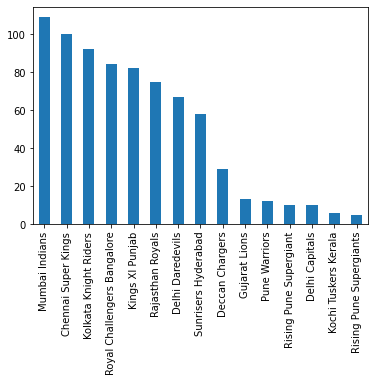

In [26]:
# teams with most wins

df1.winner.value_counts().plot(kind='bar')

In [27]:
# most wins per season

season_wins = df1.groupby("season")["winner"].value_counts()
year = 2008
seasonwins_df = pd.DataFrame(columns = ["season","team","wins"])
for i in season_wins.iteritems():
    if i[0][0] == year:
        temp_df = pd.DataFrame({"season":[i[0][0]],"team":[i[0][1]],"wins":[i[1]]})
        seasonwins_df = seasonwins_df.append(temp_df)
        year += 1
seasonwins_df

,season,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


In [28]:
# most no of player of the match

df30 = df1['player_of_match'].value_counts()
df31 =df30.to_frame()
df32 = df31.reset_index()
df32=df32.head(10)
df32

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


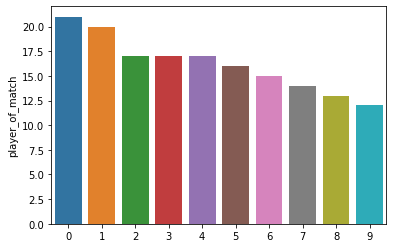

In [29]:
sns.barplot(x=df32.index,y=df32.player_of_match)

In [30]:
# win by the largest margin

df40=df1.groupby("winner").max()
df41 = df40.sort_values(["win_by_runs"],ascending=True)
df41=df41['win_by_runs']
df41

<ipython-input-30-7bbd035092b9>:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df40=df1.groupby("winner").max()


winner
Gujarat Lions                    1
Kochi Tuskers Kerala            17
Rising Pune Supergiants         34
Pune Warriors                   38
Delhi Capitals                  39
Rising Pune Supergiant          61
Deccan Chargers                 82
Chennai Super Kings             97
Delhi Daredevils                97
Rajasthan Royals               105
Kings XI Punjab                111
Sunrisers Hyderabad            118
Kolkata Knight Riders          140
Royal Challengers Bangalore    144
Mumbai Indians                 146
Name: win_by_runs, dtype: int64

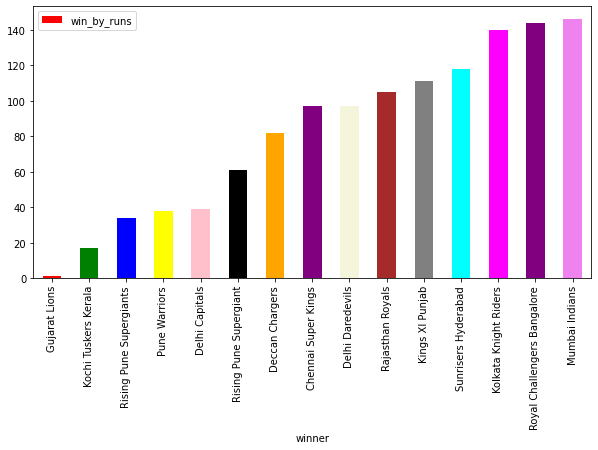

In [31]:
# visualizing win by the largest margin

df42 = df41.reset_index()
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta","purple","violet"])
df42.plot(figsize=(10, 5),kind = 'bar', x = 'winner', y = 'win_by_runs',color=colors)

In [32]:
# most wins after winning the toss

toss_winner = df1.groupby('toss_winner')['winner'].value_counts()

toss_df = pd.DataFrame(columns=['tosswinner', 'winner', 'wins'])
for items in toss_winner.iteritems():
  win_toss = pd.DataFrame({
            'tosswinner': [items[0][0]],
            'winner': [items[0][1]],
            'wins': [items[1]]
   })
  toss_df = toss_df.append(win_toss)
win1=toss_df[['winner','wins']]
win1=win1.groupby('winner').max()
win2 = win1.sort_values(["wins"],ascending=False)
win2.reset_index()

,winner,wins
0,Chennai Super Kings,57
1,Mumbai Indians,56
2,Kolkata Knight Riders,53
3,Rajasthan Royals,42
4,Royal Challengers Bangalore,41
5,Delhi Daredevils,35
6,Kings XI Punjab,35
7,Sunrisers Hyderabad,23
8,Deccan Chargers,19
9,Gujarat Lions,10


In [33]:
match_winner = df1.groupby('player_of_match')['winner'].value_counts()
match_winner

player_of_match  winner                     
A Chandila       Rajasthan Royals               1
A Joseph         Mumbai Indians                 1
A Kumble         Royal Challengers Bangalore    2
                 Deccan Chargers                1
A Mishra         Delhi Daredevils               4
                                               ..
Yuvraj Singh     Royal Challengers Bangalore    2
                 Delhi Daredevils               1
                 Kings XI Punjab                1
                 Sunrisers Hyderabad            1
Z Khan           Delhi Daredevils               1
Name: winner, Length: 325, dtype: int64

In [34]:
# man of the match contributing to team wins 

match_win_df = pd.DataFrame(columns=['matchwinner', 'winning team', 'wins'])
for items in match_winner.iteritems():
  match_win = pd.DataFrame({
            'matchwinner': [items[0][0]],
            'winning team': [items[0][1]],
            'wins': [items[1]]
   })
  match_win_df = match_win_df.append(match_win)
match_win_df.reset_index()
win5=match_win_df[['matchwinner','wins','winning team']]
win6=win5.groupby('matchwinner').max()
win7 =win6.loc[(win6['wins']>10)]
win7 = win7.sort_values(["wins"],ascending= False)
win7.reset_index()


,matchwinner,wins,winning team
0,AB de Villiers,18,Royal Challengers Bangalore
1,CH Gayle,17,Royal Challengers Bangalore
2,MS Dhoni,15,Rising Pune Supergiants
3,RG Sharma,14,Mumbai Indians
4,DA Warner,12,Sunrisers Hyderabad
5,SK Raina,12,Gujarat Lions
6,AD Russell,11,Kolkata Knight Riders
7,V Kohli,11,Royal Challengers Bangalore


# FINAL CONCLUSION FROM MATCHES DATASET

I] TOP 5 MOST SUCCESSFUL TEAMS


         1.   Mumbai Indians (4 titles) - 109 wins
         2.   Chennai Super Kings (3 titles) - 100 wins
         3.   Kolkata Knight Riders (1 title) - 92 wins
         4.   Kings XI Punjab (1 title) - 82 wins
         5.   Royal Challengers (0 titles) - 84 wins

The above teams can be endorsed by the company for their products

Factors affecting win or loss:
1. Most teams who win the toss end up winning the  match 
2. Teams with top batters are more successful
3. Teams playing in their home turf tend to win more matches

